In [1]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
#Input Data from BLS (Buruer of Labor Statistics on Occupation Types, Employee Counts, USA and States)
#Read from csv file

in_states = os.path.join("..","Resources","BLS_state_M2018_dl.csv")
states_df = pd.read_csv(in_states)

in_nation = os.path.join("..","Resources","BLS national_M2018_dl.csv")
nation_df = pd.read_csv(in_nation)


In [3]:
#Clean Data for field Total Employee count field for use

#convert null data represented by "**' to zeros
nation_df.loc[states_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"
states_df.loc[states_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"

#convert Total column to integer
nation_df['TOT_EMP'] = nation_df['TOT_EMP'].str.replace(',', '').astype(int)
states_df['TOT_EMP'] = states_df['TOT_EMP'].str.replace(',', '').astype(int)


In [4]:
#National - Major Occupations Only
nation_major_df = nation_df.loc[nation_df["OCC_GROUP"] == "major", :].reset_index(drop="true")
nation_major_count = len(nation_major_df)

#Sort Nation by Employee Count, highest to lowest
nation_major_sort = nation_major_df[["OCC_CODE", "OCC_TITLE", "OCC_GROUP", "TOT_EMP"]].sort_values("TOT_EMP", ascending=False)

nation_major_sort["OCC_TITLE"] = nation_major_sort["OCC_TITLE"].str.replace("Occupations", "", case = False) 

nation_major_sort.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
16,43-0000,Office and Administrative Support,major,21828990
15,41-0000,Sales and Related,major,14542290
12,35-0000,Food Preparation and Serving Related,major,13374620
21,53-0000,Transportation and Material Moving,major,10244260
20,51-0000,Production,major,9115530


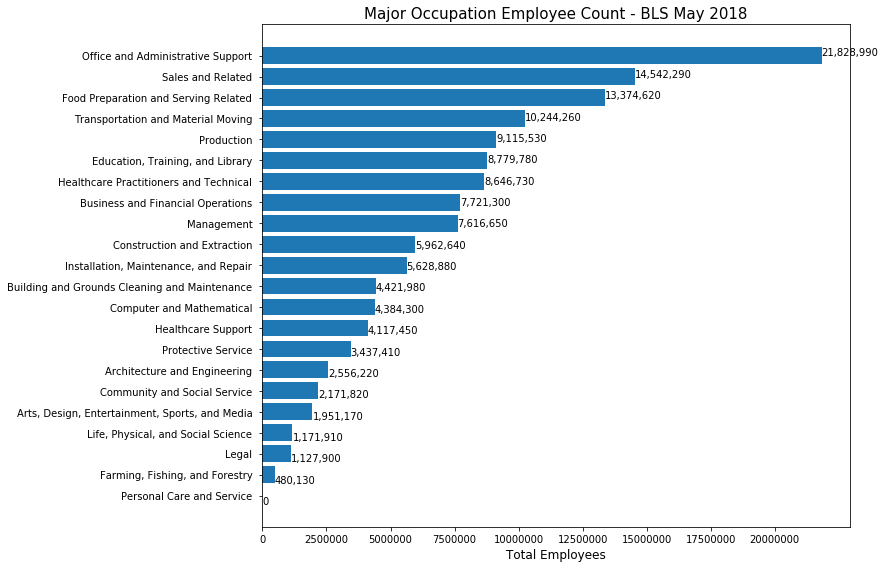

In [31]:
#Plot Output - Horizontal Bar Graph
#plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,8))

x_axis = nation_major_sort["TOT_EMP"].tolist()
y_axis = nation_major_sort["OCC_TITLE"].tolist()

# ind = np.arange(len(y_axis)) 
height_y = .8
rects1 = ax.bar(nation_major_count-1, y_axis, color='black')

ax.barh(y_axis, x_axis, height= height_y, align='center')
ax.set_yticks(y_axis)
ax.set_yticklabels(y_axis)
ax.invert_yaxis()  # labels read top-to-bottom

ax.set_xticks(np.arange(min(x_axis), max(x_axis)+5, 2500000))
ax.set_xticklabels(np.arange(min(x_axis), max(x_axis)+5, 2500000))

ax.set_xlabel("Total Employees", fontsize=12)
ax.set_title("Major Occupation Employee Count - BLS May 2018", fontsize=15)
plt.tight_layout()

#label bars
def autolabel(rects):
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        wide = rect.get_width()
        label = "{:,}".format(x_axis[ii])
        ax.text(x_axis[ii] + 11, 1.02*height, label) 
      
autolabel(rects1)

# Save the Figure
plt.savefig("../Images_LO/National_Occupation_List.png", bbox_inches = "tight")


In [32]:
#National - Pick One Occupation at the Major Group Level and store minor levels

## Show top 5 states for this group - chart

## Show National at the Minor Levels - employee count hightest to lowest - chart

#nation_major_pickone = nation_df.loc[nation_df["OCC_CODE"] == "15-0000", :].reset_index(drop="true")

nation_major_pickone = nation_df.loc[nation_df["OCC_CODE"].str.contains("15-"), :].reset_index(drop="true") 



In [33]:
nation_major_pickone

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,15-0000,Computer and Mathematical Occupations,major,4384300,0.5,44.01,"91,530",0.4,21.41,29.64,41.51,55.98,71.12,"44,530","61,640","86,340","116,440","147,920",NaN,NaN
1,15-1100,Computer Occupations,minor,4214820,0.5,43.98,"91,480",0.4,21.32,29.58,41.50,56.02,71.15,"44,350","61,520","86,320","116,520","147,990",NaN,NaN
2,15-1110,Computer and Information Research Scientists,broad,30070,3.4,59.54,"123,850",1.3,33.28,44.06,56.91,71.86,88.38,"69,230","91,650","118,370","149,470","183,820",NaN,NaN
3,15-1111,Computer and Information Research Scientists,detailed,30070,3.4,59.54,"123,850",1.3,33.28,44.06,56.91,71.86,88.38,"69,230","91,650","118,370","149,470","183,820",NaN,NaN
4,15-1120,Computer and Information Analysts,broad,696030,0.9,45.67,"94,990",0.3,26.28,33.36,43.31,55.75,70.01,"54,670","69,390","90,080","115,970","145,620",NaN,NaN
5,15-1121,Computer Systems Analysts,detailed,587970,1.0,45.01,"93,610",0.3,26.14,33.04,42.66,54.55,68.38,"54,360","68,730","88,740","113,460","142,220",NaN,NaN
6,15-1122,Information Security Analysts,detailed,108060,2.0,49.26,"102,470",0.5,27.28,35.52,47.28,60.99,75.28,"56,750","73,890","98,350","126,870","156,580",NaN,NaN
7,15-1130,Software Developers and Programmers,broad,1666270,1.2,50.23,"104,480",0.7,27.20,36.07,48.04,61.70,76.78,"56,570","75,020","99,920","128,330","159,700",NaN,NaN
8,15-1131,Computer Programmers,detailed,230470,2.4,43.07,"89,580",1.3,23.46,30.97,40.52,52.46,64.73,"48,790","64,410","84,280","109,120","134,630",NaN,NaN
9,15-1132,"Software Developers, Applications",detailed,903160,1.6,51.96,"108,080",0.9,29.64,38.14,49.82,62.72,77.54,"61,660","79,340","103,620","130,460","161,290",NaN,NaN


In [ ]:
#organize the national data to plot 
nation_major_df.sort_values("TOT_EMP", ascending=False)

In [ ]:
nation_major_df.head()

In [ ]:
# states_df.head()

states_major_df = states_df.loc[states_df["OCC_GROUP"] == "major", :].reset_index(drop="true")

states_major_df.sort_values("TOT_EMP")
